In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:

import types
import pandas as pd
from ibm_botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_ = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='',
    ibm_auth_endpoint="",
    config=Config(signature_version='oauth'),
    endpoint_url='')

body = client_eaf9794c9e98471380223251b36d2a20.get_object(Bucket='',Key='patientdataV6.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()



,AVGHEARTBEATSPERMIN,PALPITATIONSPERDAY,CHOLESTEROL,BMI,HEARTFAILURE,AGE,SEX,FAMILYHISTORY,SMOKERLAST5YRS,EXERCISEMINPERWEEK
0,93,22,163,25,N,49,F,N,N,110
1,108,22,181,24,N,32,F,N,N,192
2,86,0,239,20,N,60,F,N,N,121
3,80,36,164,31,Y,45,F,Y,N,141
4,66,36,185,23,N,39,F,N,N,63


In [4]:
#print schema
df_data_1.tail()

,AVGHEARTBEATSPERMIN,PALPITATIONSPERDAY,CHOLESTEROL,BMI,HEARTFAILURE,AGE,SEX,FAMILYHISTORY,SMOKERLAST5YRS,EXERCISEMINPERWEEK
10795,122,27,203,30,N,31,F,N,N,246
10796,67,15,186,25,N,54,F,N,N,189
10797,103,6,211,20,N,40,F,N,N,205
10798,99,30,152,27,N,32,M,N,N,211
10799,50,31,232,26,N,40,F,N,N,54


In [6]:
#print statistics of the dataset
df_data_1.describe()

,AVGHEARTBEATSPERMIN,PALPITATIONSPERDAY,CHOLESTEROL,BMI,AGE,EXERCISEMINPERWEEK
count,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000
mean,87.115093,20.423148,195.080278,26.359722,49.965185,119.729537
std,19.744375,12.165320,26.136732,3.820147,13.079281,71.147060
min,48.000000,0.000000,150.000000,20.000000,28.000000,0.000000
25%,72.000000,10.000000,173.000000,23.000000,39.000000,58.000000
50%,85.000000,20.000000,196.000000,26.000000,50.000000,119.000000
75%,100.000000,31.000000,217.000000,30.000000,61.000000,180.000000
max,161.000000,45.000000,245.000000,34.000000,72.000000,250.000000


In [7]:
# print no of records in the dataframe
df_data_1.count()

AVGHEARTBEATSPERMIN    10800
PALPITATIONSPERDAY     10800
CHOLESTEROL            10800
BMI                    10800
HEARTFAILURE           10800
AGE                    10800
SEX                    10800
FAMILYHISTORY          10800
SMOKERLAST5YRS         10800
EXERCISEMINPERWEEK     10800
dtype: int64

In [8]:
# check for as missing data
missing_data=df_data_1.isnull()
missing_data.head()

,AVGHEARTBEATSPERMIN,PALPITATIONSPERDAY,CHOLESTEROL,BMI,HEARTFAILURE,AGE,SEX,FAMILYHISTORY,SMOKERLAST5YRS,EXERCISEMINPERWEEK
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


In [7]:
# looks there is no missing values but we will count 
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

AVGHEARTBEATSPERMIN
False    10800
Name: AVGHEARTBEATSPERMIN, dtype: int64

PALPITATIONSPERDAY
False    10800
Name: PALPITATIONSPERDAY, dtype: int64

CHOLESTEROL
False    10800
Name: CHOLESTEROL, dtype: int64

BMI
False    10800
Name: BMI, dtype: int64

HEARTFAILURE
False    10800
Name: HEARTFAILURE, dtype: int64

AGE
False    10800
Name: AGE, dtype: int64

SEX
False    10800
Name: SEX, dtype: int64

FAMILYHISTORY
False    10800
Name: FAMILYHISTORY, dtype: int64

SMOKERLAST5YRS
False    10800
Name: SMOKERLAST5YRS, dtype: int64

EXERCISEMINPERWEEK
False    10800
Name: EXERCISEMINPERWEEK, dtype: int64



In [9]:
# we don't have any missing data in the file as its false for all the records, lets check shape of the file
df_data_1.shape

(10800, 10)

In [10]:
# we have 10800 records and 10 columns
# lets check if we have correct data formats 
df_data_1.dtypes

AVGHEARTBEATSPERMIN     int64
PALPITATIONSPERDAY      int64
CHOLESTEROL             int64
BMI                     int64
HEARTFAILURE           object
AGE                     int64
SEX                    object
FAMILYHISTORY          object
SMOKERLAST5YRS         object
EXERCISEMINPERWEEK      int64
dtype: object

In [11]:
#correlation between numeric fields
df_data_1.corr()

,AVGHEARTBEATSPERMIN,PALPITATIONSPERDAY,CHOLESTEROL,BMI,AGE,EXERCISEMINPERWEEK
AVGHEARTBEATSPERMIN,1.000000,0.006528,0.005837,0.050005,-0.001936,-0.019575
PALPITATIONSPERDAY,0.006528,1.000000,0.008507,0.031096,0.009795,-0.009556
CHOLESTEROL,0.005837,0.008507,1.000000,0.011770,-0.012401,-0.008601
BMI,0.050005,0.031096,0.011770,1.000000,-0.005033,-0.035000
AGE,-0.001936,0.009795,-0.012401,-0.005033,1.000000,-0.013585
EXERCISEMINPERWEEK,-0.019575,-0.009556,-0.008601,-0.035000,-0.013585,1.000000


In [12]:
# we have correct formats for all the columns. Heartfailure is our target variable, lets consider this as our label and convert Sex, FamilyHistory and 
#smokerlast5yrs to int

dummy_variable_1 = pd.get_dummies(df_data_1["SEX"])
dummy_variable_1.rename(columns={'M':'Male', 'F':'Female'}, inplace=True)
df_data_1 = pd.concat([df_data_1, dummy_variable_1], axis=1)
df_data_1.tail()


,AVGHEARTBEATSPERMIN,PALPITATIONSPERDAY,CHOLESTEROL,BMI,HEARTFAILURE,AGE,SEX,FAMILYHISTORY,SMOKERLAST5YRS,EXERCISEMINPERWEEK,Female,Male
10795,122,27,203,30,N,31,F,N,N,246,1,0
10796,67,15,186,25,N,54,F,N,N,189,1,0
10797,103,6,211,20,N,40,F,N,N,205,1,0
10798,99,30,152,27,N,32,M,N,N,211,0,1
10799,50,31,232,26,N,40,F,N,N,54,1,0


In [13]:
dummy_variable_2 = pd.get_dummies(df_data_1["FAMILYHISTORY"])
dummy_variable_2.rename(columns={'N':'Family_Hist_N', 'Y':'Family_Hist_Y'}, inplace=True)
df_data_1 = pd.concat([df_data_1, dummy_variable_2], axis=1)
df_data_1.head()

,AVGHEARTBEATSPERMIN,PALPITATIONSPERDAY,CHOLESTEROL,BMI,HEARTFAILURE,AGE,SEX,FAMILYHISTORY,SMOKERLAST5YRS,EXERCISEMINPERWEEK,Female,Male,Family_Hist_N,Family_Hist_Y
0,93,22,163,25,N,49,F,N,N,110,1,0,1,0
1,108,22,181,24,N,32,F,N,N,192,1,0,1,0
2,86,0,239,20,N,60,F,N,N,121,1,0,1,0
3,80,36,164,31,Y,45,F,Y,N,141,1,0,0,1
4,66,36,185,23,N,39,F,N,N,63,1,0,1,0


In [14]:
dummy_variable_3 = pd.get_dummies(df_data_1["SMOKERLAST5YRS"])
dummy_variable_3.rename(columns={'N':'Smoker_last5yrs_N', 'Y':'Smoker_last5yrs_Y'}, inplace=True)
df_data_1 = pd.concat([df_data_1, dummy_variable_3], axis=1)
df_data_1.head()

,AVGHEARTBEATSPERMIN,PALPITATIONSPERDAY,CHOLESTEROL,BMI,HEARTFAILURE,AGE,SEX,FAMILYHISTORY,SMOKERLAST5YRS,EXERCISEMINPERWEEK,Female,Male,Family_Hist_N,Family_Hist_Y,Smoker_last5yrs_N,Smoker_last5yrs_Y
0,93,22,163,25,N,49,F,N,N,110,1,0,1,0,1,0
1,108,22,181,24,N,32,F,N,N,192,1,0,1,0,1,0
2,86,0,239,20,N,60,F,N,N,121,1,0,1,0,1,0
3,80,36,164,31,Y,45,F,Y,N,141,1,0,0,1,1,0
4,66,36,185,23,N,39,F,N,N,63,1,0,1,0,1,0


In [15]:
df_data_1.drop("SEX",axis=1,inplace=True)
df_data_1.head()

,AVGHEARTBEATSPERMIN,PALPITATIONSPERDAY,CHOLESTEROL,BMI,HEARTFAILURE,AGE,FAMILYHISTORY,SMOKERLAST5YRS,EXERCISEMINPERWEEK,Female,Male,Family_Hist_N,Family_Hist_Y,Smoker_last5yrs_N,Smoker_last5yrs_Y
0,93,22,163,25,N,49,N,N,110,1,0,1,0,1,0
1,108,22,181,24,N,32,N,N,192,1,0,1,0,1,0
2,86,0,239,20,N,60,N,N,121,1,0,1,0,1,0
3,80,36,164,31,Y,45,Y,N,141,1,0,0,1,1,0
4,66,36,185,23,N,39,N,N,63,1,0,1,0,1,0


In [16]:
df_data_1.drop(["FAMILYHISTORY","SMOKERLAST5YRS"],axis=1,inplace=True)
df_data_1.head()

,AVGHEARTBEATSPERMIN,PALPITATIONSPERDAY,CHOLESTEROL,BMI,HEARTFAILURE,AGE,EXERCISEMINPERWEEK,Female,Male,Family_Hist_N,Family_Hist_Y,Smoker_last5yrs_N,Smoker_last5yrs_Y
0,93,22,163,25,N,49,110,1,0,1,0,1,0
1,108,22,181,24,N,32,192,1,0,1,0,1,0
2,86,0,239,20,N,60,121,1,0,1,0,1,0
3,80,36,164,31,Y,45,141,1,0,0,1,1,0
4,66,36,185,23,N,39,63,1,0,1,0,1,0


In [17]:
df_data_1.corr()

,AVGHEARTBEATSPERMIN,PALPITATIONSPERDAY,CHOLESTEROL,BMI,AGE,EXERCISEMINPERWEEK,Female,Male,Family_Hist_N,Family_Hist_Y,Smoker_last5yrs_N,Smoker_last5yrs_Y
AVGHEARTBEATSPERMIN,1.000000,0.006528,0.005837,0.050005,-0.001936,-0.019575,0.002783,-0.002783,-0.153367,0.153367,-0.029828,0.029828
PALPITATIONSPERDAY,0.006528,1.000000,0.008507,0.031096,0.009795,-0.009556,-0.000794,0.000794,-0.041322,0.041322,-0.008423,0.008423
CHOLESTEROL,0.005837,0.008507,1.000000,0.011770,-0.012401,-0.008601,-0.004805,0.004805,-0.006940,0.006940,-0.002050,0.002050
BMI,0.050005,0.031096,0.011770,1.000000,-0.005033,-0.035000,0.005911,-0.005911,-0.087891,0.087891,-0.003152,0.003152
AGE,-0.001936,0.009795,-0.012401,-0.005033,1.000000,-0.013585,0.000172,-0.000172,0.014516,-0.014516,-0.003387,0.003387
EXERCISEMINPERWEEK,-0.019575,-0.009556,-0.008601,-0.035000,-0.013585,1.000000,-0.014572,0.014572,0.053195,-0.053195,0.009926,-0.009926
Female,0.002783,-0.000794,-0.004805,0.005911,0.000172,-0.014572,1.000000,-1.000000,0.002176,-0.002176,-0.010618,0.010618
Male,-0.002783,0.000794,0.004805,-0.005911,-0.000172,0.014572,-1.000000,1.000000,-0.002176,0.002176,0.010618,-0.010618
Family_Hist_N,-0.153367,-0.041322,-0.006940,-0.087891,0.014516,0.053195,0.002176,-0.002176,1.000000,-1.000000,0.053356,-0.053356
Family_Hist_Y,0.153367,0.041322,0.006940,0.087891,-0.014516,-0.053195,-0.002176,0.002176,-1.000000,1.000000,-0.053356,0.053356


/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


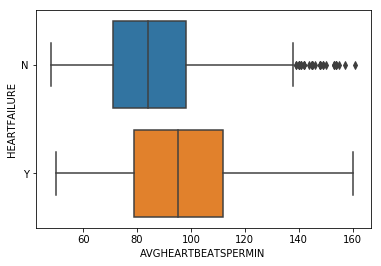

In [18]:
sns.boxplot(x="AVGHEARTBEATSPERMIN", y="HEARTFAILURE", data=df_data_1)


/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


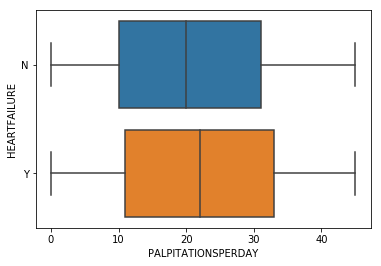

In [21]:
# Here we can see that as AVG Heartbeat per min mean for failure is equal 75% value in case of not failure, so we need to consider this 
sns.boxplot(x="PALPITATIONSPERDAY", y="HEARTFAILURE", data=df_data_1)


/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


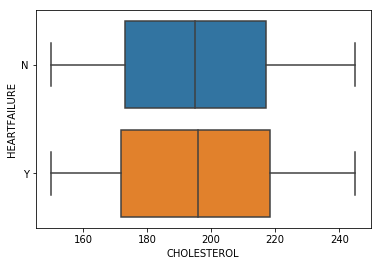

In [19]:
sns.boxplot(x="CHOLESTEROL", y="HEARTFAILURE", data=df_data_1)


/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


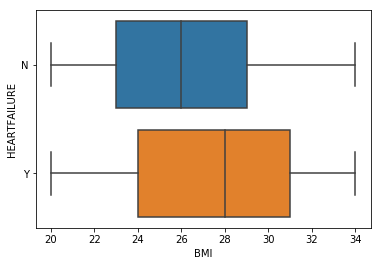

In [20]:
sns.boxplot(x="BMI", y="HEARTFAILURE", data=df_data_1)

/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


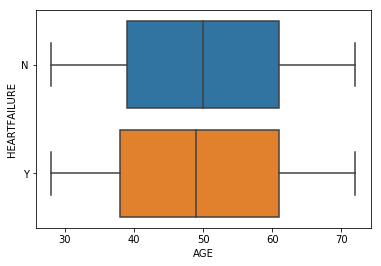

In [21]:
sns.boxplot(x="AGE", y="HEARTFAILURE", data=df_data_1)


/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


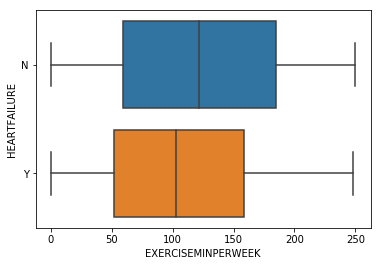

In [22]:
sns.boxplot(x="EXERCISEMINPERWEEK", y="HEARTFAILURE", data=df_data_1)

In [23]:
from scipy import stats

In [24]:
dummy_variable_4 = pd.get_dummies(df_data_1["HEARTFAILURE"])
dummy_variable_4.rename(columns={'N':'Heart_fail_N', 'Y':'Heart_fail_Y'}, inplace=True)
df_data_1 = pd.concat([df_data_1, dummy_variable_4], axis=1)
df_data_1.head()

,AVGHEARTBEATSPERMIN,PALPITATIONSPERDAY,CHOLESTEROL,BMI,HEARTFAILURE,AGE,EXERCISEMINPERWEEK,Female,Male,Family_Hist_N,Family_Hist_Y,Smoker_last5yrs_N,Smoker_last5yrs_Y,Heart_fail_N,Heart_fail_Y
0,93,22,163,25,N,49,110,1,0,1,0,1,0,1,0
1,108,22,181,24,N,32,192,1,0,1,0,1,0,1,0
2,86,0,239,20,N,60,121,1,0,1,0,1,0,1,0
3,80,36,164,31,Y,45,141,1,0,0,1,1,0,0,1
4,66,36,185,23,N,39,63,1,0,1,0,1,0,1,0


In [25]:
pearson_coef, p_value = stats.pearsonr(df_data_1['BMI'], df_data_1['Heart_fail_Y'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.136221599538  with a P-value of P = 6.76242267205e-46


In [26]:
df_data_1.corr()

,AVGHEARTBEATSPERMIN,PALPITATIONSPERDAY,CHOLESTEROL,BMI,AGE,EXERCISEMINPERWEEK,Female,Male,Family_Hist_N,Family_Hist_Y,Smoker_last5yrs_N,Smoker_last5yrs_Y,Heart_fail_N,Heart_fail_Y
AVGHEARTBEATSPERMIN,1.000000,0.006528,0.005837,0.050005,-0.001936,-0.019575,0.002783,-0.002783,-0.153367,0.153367,-0.029828,0.029828,-0.218694,0.218694
PALPITATIONSPERDAY,0.006528,1.000000,0.008507,0.031096,0.009795,-0.009556,-0.000794,0.000794,-0.041322,0.041322,-0.008423,0.008423,-0.054420,0.054420
CHOLESTEROL,0.005837,0.008507,1.000000,0.011770,-0.012401,-0.008601,-0.004805,0.004805,-0.006940,0.006940,-0.002050,0.002050,-0.016542,0.016542
BMI,0.050005,0.031096,0.011770,1.000000,-0.005033,-0.035000,0.005911,-0.005911,-0.087891,0.087891,-0.003152,0.003152,-0.136222,0.136222
AGE,-0.001936,0.009795,-0.012401,-0.005033,1.000000,-0.013585,0.000172,-0.000172,0.014516,-0.014516,-0.003387,0.003387,0.017005,-0.017005
EXERCISEMINPERWEEK,-0.019575,-0.009556,-0.008601,-0.035000,-0.013585,1.000000,-0.014572,0.014572,0.053195,-0.053195,0.009926,-0.009926,0.085311,-0.085311
Female,0.002783,-0.000794,-0.004805,0.005911,0.000172,-0.014572,1.000000,-1.000000,0.002176,-0.002176,-0.010618,0.010618,-0.007444,0.007444
Male,-0.002783,0.000794,0.004805,-0.005911,-0.000172,0.014572,-1.000000,1.000000,-0.002176,0.002176,0.010618,-0.010618,0.007444,-0.007444
Family_Hist_N,-0.153367,-0.041322,-0.006940,-0.087891,0.014516,0.053195,0.002176,-0.002176,1.000000,-1.000000,0.053356,-0.053356,0.399565,-0.399565
Family_Hist_Y,0.153367,0.041322,0.006940,0.087891,-0.014516,-0.053195,-0.002176,0.002176,-1.000000,1.000000,-0.053356,0.053356,-0.399565,0.399565


In [27]:
pearson_coef, p_value = stats.pearsonr(df_data_1['AGE'], df_data_1['Heart_fail_Y'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.0170048297671  with a P-value of P = 0.0772086428783


In [28]:
pearson_coef, p_value = stats.pearsonr(df_data_1['EXERCISEMINPERWEEK'], df_data_1['Heart_fail_Y'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.0853113693431  with a P-value of P = 6.62709157331e-19


In [29]:
pearson_coef, p_value = stats.pearsonr(df_data_1['AVGHEARTBEATSPERMIN'], df_data_1['Heart_fail_Y'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)
pearson_coef, p_value = stats.pearsonr(df_data_1['PALPITATIONSPERDAY'], df_data_1['Heart_fail_Y'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)
pearson_coef, p_value = stats.pearsonr(df_data_1['CHOLESTEROL'], df_data_1['Heart_fail_Y'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)
pearson_coef, p_value = stats.pearsonr(df_data_1['BMI'], df_data_1['Heart_fail_Y'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.218693773355  with a P-value of P = 4.28201766026e-117
The Pearson Correlation Coefficient is 0.0544203029571  with a P-value of P = 1.52201896751e-08
The Pearson Correlation Coefficient is 0.0165420724386  with a P-value of P = 0.0856105075
The Pearson Correlation Coefficient is 0.136221599538  with a P-value of P = 6.76242267205e-46


In [30]:
pearson_coef, p_value = stats.pearsonr(df_data_1['Female'], df_data_1['Heart_fail_Y'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)
pearson_coef, p_value = stats.pearsonr(df_data_1['Male'], df_data_1['Heart_fail_Y'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.00744402735172  with a P-value of P = 0.439210444261
The Pearson Correlation Coefficient is -0.00744402735172  with a P-value of P = 0.439210444261


In [31]:
pearson_coef, p_value = stats.pearsonr(df_data_1['Family_Hist_N'], df_data_1['Heart_fail_Y'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)
pearson_coef, p_value = stats.pearsonr(df_data_1['Family_Hist_Y'], df_data_1['Heart_fail_Y'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.399564842098  with a P-value of P = 0.0
The Pearson Correlation Coefficient is 0.399564842098  with a P-value of P = 0.0


In [32]:
pearson_coef, p_value = stats.pearsonr(df_data_1['Smoker_last5yrs_N'], df_data_1['Heart_fail_Y'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)
pearson_coef, p_value = stats.pearsonr(df_data_1['Smoker_last5yrs_Y'], df_data_1['Heart_fail_Y'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.0811690297024  with a P-value of P = 2.95578097492e-17
The Pearson Correlation Coefficient is 0.0811690297024  with a P-value of P = 2.95578097492e-17


In [ ]:
#since Since for some the features the p-value is < 0.001,the correlation between HEARTFAILURE-Y and that feature is statistically significant and for some the features the coefficient of ~ negative value shows that the relationship is negative and moderately strong.
# so we consider all the features are significant